# Task Specification

Our task is to implement a Image Classification model to classify between fresh and rotten fruits. The data input are stored in .png format. The objective is to assign each fruits into six categories: fresh apple, fresh banana, fresh orange, rotten apple, rotten banana and rotten oranges. We'll be using references from existing code as our base.

# Dataset Acquisition
The dataset of Fresh & Rotten Fruits was found from the following link:
https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification

The baseline code for image classification can be found in the following link: https://www.kaggle.com/code/kevinchris7979/rotten-and-fresh-detection

The datasets are saved in the directory **archive/dataset/dataset**.


# Dataset Preparation

In [1]:
# Import the libraries
import tensorflow as tf
import keras
import torch
import torchvision
import cv2
import numpy as np

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


#### Load dataset

In [3]:
import os
import glob

base_dir = './archive/dataset/dataset'

train_fresh_apple_dir = os.path.join(base_dir, 'train/freshapples')
train_rotten_apple_dir = os.path.join(base_dir, 'train/rottenapples')
train_fresh_banana_dir = os.path.join(base_dir, 'train/freshbanana')
train_rotten_banana_dir = os.path.join(base_dir, 'train/rottenbanana')
train_fresh_orange_dir = os.path.join(base_dir, 'train/freshoranges')
train_rotten_orange_dir = os.path.join(base_dir, 'train/rottenoranges')

test_fresh_apple_dir = os.path.join(base_dir, 'test/freshapples')
test_rotten_apple_dir = os.path.join(base_dir, 'test/rottenapples')
test_fresh_banana_dir = os.path.join(base_dir, 'test/freshbanana')
test_rotten_banana_dir = os.path.join(base_dir, 'test/rottenbanana')
test_fresh_orange_dir = os.path.join(base_dir, 'test/freshoranges')
test_rotten_orange_dir = os.path.join(base_dir, 'test/rottenoranges')

# Use glob to get the file paths
train_fresh_apple_files = glob.glob(train_fresh_apple_dir + '/*')
train_rotten_apple_files = glob.glob(train_rotten_apple_dir + '/*')
train_fresh_banana_files = glob.glob(train_fresh_banana_dir + '/*')
train_rotten_banana_files = glob.glob(train_rotten_banana_dir + '/*')
train_fresh_orange_files = glob.glob(train_fresh_orange_dir + '/*')
train_rotten_orange_files = glob.glob(train_rotten_orange_dir + '/*')

test_fresh_apple_files = glob.glob(test_fresh_apple_dir + '/*')
test_rotten_apple_files = glob.glob(test_rotten_apple_dir + '/*')
test_fresh_banana_files = glob.glob(test_fresh_banana_dir + '/*')
test_rotten_banana_files = glob.glob(test_rotten_banana_dir + '/*')
test_fresh_orange_files = glob.glob(test_fresh_orange_dir + '/*')
test_rotten_orange_files = glob.glob(test_rotten_orange_dir + '/*')

print('train samples of fresh apple:', len(train_fresh_apple_files))
print('train samples of rotten apple:', len(train_rotten_apple_files))
print('train samples of apple:', len(train_fresh_apple_files) + len(train_rotten_apple_files))
print('train samples of fresh banana:', len(train_fresh_banana_files))
print('train samples of rotten banana:', len(train_rotten_banana_files))
print('train samples of banana:', len(train_fresh_banana_files) + len(train_rotten_banana_files))
print('train samples of fresh orange:', len(train_fresh_orange_files))
print('train samples of rotten orange:', len(train_rotten_orange_files))
print('train samples of orange:', len(train_fresh_orange_files) + len(train_rotten_orange_files))
print('total train samples:', 
      len(train_fresh_apple_files) + 
      len(train_rotten_apple_files) + 
      len(train_fresh_banana_files) + 
      len(train_rotten_banana_files) +
      len(train_fresh_orange_files) + 
      len(train_rotten_orange_files))

test_fresh_apple_files = glob.glob(test_fresh_apple_dir + '/*')
test_rotten_apple_files = glob.glob(test_rotten_apple_dir + '/*')
test_fresh_banana_files = glob.glob(test_fresh_banana_dir + '/*')
test_rotten_banana_files = glob.glob(test_rotten_banana_dir + '/*')
test_fresh_orange_files = glob.glob(test_fresh_orange_dir + '/*')
test_rotten_orange_files = glob.glob(test_rotten_orange_dir + '/*')

print('test samples of fresh apple:', len(test_fresh_apple_files))
print('test samples of rotten apple:', len(test_rotten_apple_files))
print('test samples of apple:', len(test_fresh_apple_files) + len(test_rotten_apple_files))
print('test samples of fresh banana:', len(test_fresh_banana_files))
print('test samples of rotten banana:', len(test_rotten_banana_files))
print('test samples of banana:', len(test_fresh_banana_files) + len(test_rotten_banana_files))
print('test samples of fresh orange:', len(test_fresh_orange_files))
print('test samples of rotten orange:', len(test_rotten_orange_files))
print('test samples of orange:', len(test_fresh_orange_files) + len(test_rotten_orange_files))
print('total test samples:', 
      len(test_fresh_apple_files) + 
      len(test_rotten_apple_files) + 
      len(test_fresh_banana_files) + 
      len(test_rotten_banana_files) +
      len(test_fresh_orange_files) + 
      len(test_rotten_orange_files))


train samples of fresh apple: 1693
train samples of rotten apple: 2342
train samples of apple: 4035
train samples of fresh banana: 1581
train samples of rotten banana: 2224
train samples of banana: 3805
train samples of fresh orange: 1466
train samples of rotten orange: 1595
train samples of orange: 3061
total train samples: 10901
test samples of fresh apple: 395
test samples of rotten apple: 601
test samples of apple: 996
test samples of fresh banana: 381
test samples of rotten banana: 530
test samples of banana: 911
test samples of fresh orange: 388
test samples of rotten orange: 403
test samples of orange: 791
total test samples: 2698


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
import pandas as pd


input_shape = (224, 224, 3)
mobilenet_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
#output = mobilenet.layers[-1].output
#output = Flatten()(output)
#mobilenet_model = Model(mobilenet.input, output)

mobilenet_model.trainable = True
#fine_tune_at = 100
# Freeze all the layers before the `fine_tune_at` layer
#for layer in mobilenet_model.layers[:fine_tune_at]:
    #layer.trainable =  False

mobilenet_model.summary()



Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv

 block_3_expand (Conv2D)     (None, 56, 56, 144)          3456      ['block_2_add[0][0]']         
                                                                                                  
 block_3_expand_BN (BatchNo  (None, 56, 56, 144)          576       ['block_3_expand[0][0]']      
 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_d

 )                                                                                                
                                                                                                  
 block_6_depthwise (Depthwi  (None, 14, 14, 192)          1728      ['block_6_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
          

 block_9_project (Conv2D)    (None, 14, 14, 64)           24576     ['block_9_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
          

                                                                                                  
 block_13_expand (Conv2D)    (None, 14, 14, 576)          55296     ['block_12_add[0][0]']        
                                                                                                  
 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)       

                                                                                                  
 block_16_expand_relu (ReLU  (None, 7, 7, 960)            0         ['block_16_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_

In [5]:
import os
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255, 
                                   zoom_range=0.3, 
                                   rotation_range=50,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255)

dataset_path = './archive/dataset/dataset'

train_set_path = os.path.join(dataset_path, 'train')

val_set_path = os.path.join(dataset_path, 'test')

BATCH_SIZE = 64
TARGET_SIZE = input_shape[:2]

train_generator = train_datagen.flow_from_directory(train_set_path,
                                                 target_size = TARGET_SIZE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(val_set_path,
                                                target_size = TARGET_SIZE,
                                                batch_size = BATCH_SIZE,
                                                class_mode = 'categorical')


model = Sequential()
model.add(mobilenet_model)

# Add new layers
model.add(GlobalAveragePooling2D())
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
model.summary()

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2265670 (8.64 MB)
Trainable params: 2231558 (8.51 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Model Training


In [7]:
# The higher the number of epochs, the higher the accuracy will be, however, more time will be consumed
EPOCHS = 7
history = model.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.n // BATCH_SIZE, 
                              epochs=EPOCHS,
                              validation_data=val_generator, 
                              validation_steps=val_generator.n // BATCH_SIZE, 
                              verbose=1)  

C:\Users\yuwon\AppData\Local\Temp\ipykernel_15108\733427739.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/7



170/170 [==============================] - 430s 2s/step - loss: 0.2906 - accuracy: 0.9099 - val_loss: 14.0947 - val_accuracy: 0.2206
Epoch 2/7
170/170 [==============================] - 390s 2s/step - loss: 0.1198 - accuracy: 0.9652 - val_loss: 21.6336 - val_accuracy: 0.2188
Epoch 3/7
170/170 [==============================] - 375s 2s/step - loss: 0.0771 - accuracy: 0.9767 - val_loss: 11.7171 - val_accuracy: 0.4766
Epoch 4/7
170/170 [==============================] - 744s 4s/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 33.8197 - val_accuracy: 0.1548
Epoch 5/7
170/170 [==============================] - 395s 2s/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 19.5228 - val_accuracy: 0.2571
Epoch 6/7
170/170 [==============================] - 396s 2s/step - loss: 0.0501 - accuracy: 0.9853 - val_loss: 12.9564 - val_accuracy: 0.3713
Epoch 7/7
170/170 [==============================] - 382s 2s/step - loss: 0.0396 - accuracy: 0.9884 - val_loss: 16.4460 - val_accuracy: 0.2928


In [8]:
model.save('Fresh_Rotten_Fruits_MobileNetV2_Transfer_Learning2(98).h5')

C:\Users\yuwon\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


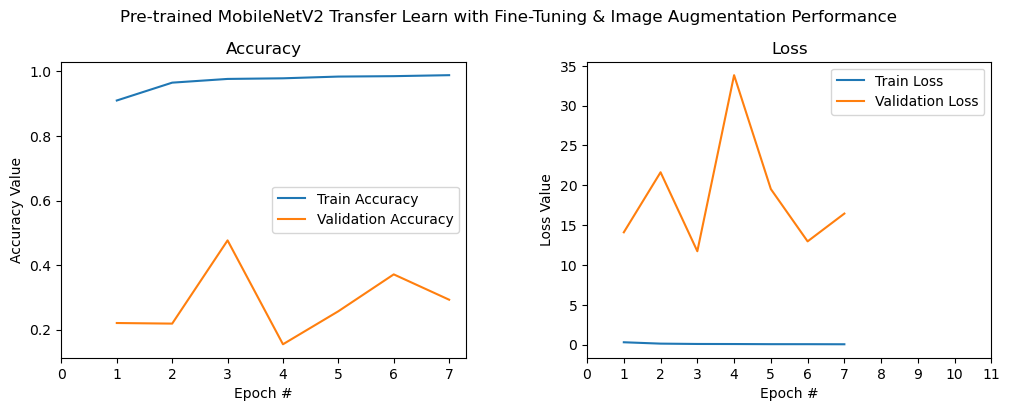

In [9]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained MobileNetV2 Transfer Learn with Fine-Tuning & Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,8))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 8, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 12, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [10]:
model.evaluate(val_generator, steps=train_generator.n // BATCH_SIZE)

 43/170 [======>.......................] - ETA: 1:06 - loss: 16.4687 - accuracy: 0.2921WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 170 batches). You may need to use the repeat() function when building your dataset.


170/170 [==============================] - 23s 131ms/step - loss: 16.4687 - accuracy: 0.2921


[16.468685150146484, 0.292068213224411]